# Problem 3 : Emergence of the 3-core

In this section we are going to investigate the emergence and the size of the q-Core in the configuration model. 

First let's do some theoretical work. The q-Core algorithm is basicly removing all vertices of degree $d<q$ one by one. This can be analyse through the prism of stochastic processes where each time a vertex is removed (if there is still one to remove).

We use the following notations : 
$$
t =\dfrac{T}{N} the~fraction~of~removed~vertices~;~N(t)=(1-t)N~~
 the~total~number~of~vertices~and~N_d(t)~the~number~of~vertices~of~degree~d
$$
$$
\chi = 1 \space if \space d \space < \space 3 \space and \space 0 \space else \space ; \space \overline{\chi} = \sum_d \space \chi_d \space p_d(t) ~ ; ~ \overline{d\chi} = \sum_d ~d~\chi_d~ p_d(t) ; ~ and ~ c(t) = \sum_d~d~p_d(t) = 1 + 3\pi
$$

We are interrested in the variation of $N_d$ which depends on 3 events :
* probability to remove a vertex of degree less than q ($N_d$ decrease by one)
* probability to remove a neighbor and he has degree d+1 ($N_d$ increase by one)
* probability to remove a neighbor and he has degree d ($N_d$ decrease by one)

Thus, one can write the following equation of evolution for $N_d$ :
$$
N_d(t+\Delta t) - N_d(t) = - \dfrac{\chi_d~p_d}{\overline{\chi}} + \dfrac{\overline{d\chi}}{\overline{\chi}} \left( - \dfrac{dp_d}{c} + \dfrac{(d+1)p_{d+1}}{c} \right)
$$

With $\Delta t$ being 1/N and N going to infinity one can see that $ N_d(t+\Delta t) - N_d(t) = \dfrac{d}{dt}((1-t)p_d(t)) $ 

This leads to 5 coupled differential euqation for the $p_d$'s with initial condition : 

$p_1(t=0) = 1-\pi$ ; $p_4(t=0) = \pi$ and $p_0(t=0) = p_2(t=0) = p_3(t=0) = 0$

The numerical resolution of those 5 equation for t in [0,1] can be done and give the value $\pi_c$ at which the 3-Core appears. 

Let's now look at a simulation.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rdm
import numpy as np
import scipy.integrate as scp

In [3]:
def q_degree(q,G): # function that return False if  
    r = True       # there if any vx of degree less (strictly) than q
    for i in nx.nodes(G):
        if G.degree(i) < q:
            r = False
    return r

In [4]:
# Definition Degree Probability distribution
def degree(pi_p):
    if rdm.random() < (1-pi_p):
        return 1
    else:
        return 4

# The q-Core Algorithm for graphs of given degree distribution

First we are going to create the graph with the method we already know and then we will use the q-core algorithm to determine the 3-core graph.

In [5]:
# definition of a function that will create the graph
def Graph(N_p,pi_p):
    c=False
    while c==False:
        K=[]
        for i in range(N_p):
            K.append(degree(pi_p)) #Creation of the list of all degrees
        if sum(K)%2 == 0:
            c=True
    Gr = nx.configuration_model(K)
    return Gr

In [9]:
# Creation of the graph
# ---------------------
N=100
pi=0.8
G=Graph(N,pi)
nx.degree(G)

MultiDegreeView({0: 4, 1: 1, 2: 4, 3: 4, 4: 4, 5: 1, 6: 4, 7: 1, 8: 1, 9: 4, 10: 1, 11: 4, 12: 4, 13: 4, 14: 4, 15: 1, 16: 4, 17: 4, 18: 4, 19: 4, 20: 1, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 1, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 1, 38: 4, 39: 4, 40: 4, 41: 1, 42: 4, 43: 4, 44: 4, 45: 4, 46: 1, 47: 4, 48: 4, 49: 4, 50: 1, 51: 1, 52: 4, 53: 4, 54: 4, 55: 4, 56: 4, 57: 1, 58: 1, 59: 4, 60: 1, 61: 4, 62: 4, 63: 4, 64: 1, 65: 1, 66: 4, 67: 4, 68: 4, 69: 1, 70: 4, 71: 4, 72: 4, 73: 4, 74: 4, 75: 4, 76: 1, 77: 4, 78: 4, 79: 4, 80: 4, 81: 4, 82: 4, 83: 4, 84: 4, 85: 4, 86: 4, 87: 4, 88: 4, 89: 4, 90: 1, 91: 4, 92: 4, 93: 4, 94: 4, 95: 4, 96: 1, 97: 4, 98: 4, 99: 4})

In [10]:
# The q-core algorithm
# --------------------

q=3
while q_degree(q,G) == False: 
    L = list(nx.nodes(G))
    for i in L:
        if G.degree(i) < q:
            G.remove_node(i)
            
nx.degree(G)

MultiDegreeView({0: 3, 2: 3, 3: 3, 4: 4, 6: 4, 9: 4, 11: 3, 12: 4, 13: 4, 14: 4, 16: 4, 17: 4, 18: 4, 19: 4, 21: 3, 22: 4, 23: 4, 24: 4, 25: 4, 27: 4, 28: 3, 29: 3, 30: 4, 31: 3, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 38: 4, 39: 4, 40: 4, 42: 4, 43: 4, 44: 4, 45: 3, 47: 4, 48: 4, 49: 4, 52: 4, 53: 4, 54: 3, 55: 4, 56: 4, 59: 4, 61: 4, 62: 4, 63: 3, 66: 4, 67: 4, 68: 4, 70: 4, 71: 4, 72: 4, 73: 3, 74: 4, 75: 3, 77: 4, 78: 4, 79: 4, 80: 3, 81: 4, 82: 4, 83: 4, 84: 4, 85: 3, 86: 3, 87: 3, 88: 4, 89: 3, 91: 4, 92: 3, 93: 4, 94: 4, 95: 3, 97: 3, 98: 4, 99: 3})

One can easily see here that the total number of vertices decreased and that they are all of degree greater than 3.

We now aim to make a phase diagram of the phase transition between a graph where the 3-core do not exist and a graph where the 3-core exist. Will it be a first or second order transition and at which value $\pi_c$ will it happen ? 

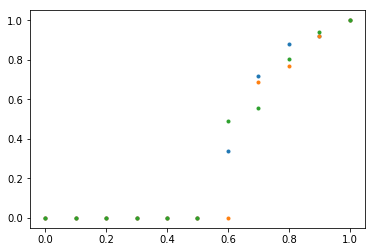

In [11]:
# Phase diagram of the mergence of the 3-Core
# -------------------------------------------

q = 3

for N in [50,100,200]: # number of vertices 
    S = [] # size of the 3-Core
    Pi = [] # list of the pi value used
    for pi in [i/10 for i in range(0,11)]: #parameter of the degree distribution
        Pi.append(pi)
        
        G=Graph(N,pi)

        while q_degree(q,G) == False: 
            L = list(nx.nodes(G))
            for i in L:
                if G.degree(i) < q:
                    G.remove_node(i)
        S.append(len(G)/N)
    plt.plot(Pi,S,'.',label=str(N))
plt.show()

After several realisation of this graph we can see that the treshold value is greater than 0.5 then we are going to reduce our analysis to [0.5,1] for $\pi$.

In [12]:
# Phase diagram of the emergence of the q-Core
# -------------------------------------------
q = 3

for N in [50,100,1000]:
    S = [] # size of the 3-Core
    Pi = [] # list of the pi value used   
    for pi in [0.5 + i/500 for i in range(0,251)]: #parameter of the degree distribution
        Pi.append(pi)    
        
        s = [] # size of the 3-core for different realisation
        for r in range(100): # realisations of the same algo for averages
            
            K = [] # list of the degrees of each vx
            for i in range(N):
                K.append(degree(pi)) #Creation of the list of all degrees
            
            G = Graph(N,pi)
            # q-core algorithm
            while q_degree(q,G) == False: 
                L = list(nx.nodes(G))
                for i in L:
                    if G.degree(i) < q:
                        G.remove_node(i)
                        
            s.append(len(G)/N)
        S.append(sum(s)/100)
    title = 'N = ' + str(N)
    plt.plot(Pi,S,'.',label=title)
plt.legend()
plt.xlabel('$\pi$')
plt.ylabel('relative size of th 3-core')
plt.savefig('3-core.png')

The results can be seen here : ![3-core](3-core_PhaseDiag.png)

Once again we can see the finite size effect that smooth the curves and fluctuations inversely linked with the total number of vertices. 

Nonetheless, we can see that as N tend to inifity the transition seems to be discontinuous.